In [1]:
!ls

data					    preprocess_deeplog_data.ipynb
distilled_model.pdf			    preprocess_logpai_data.ipynb
evaluate_distilled_model_results.ipynb	    __pycache__
evaluate_predictions.ipynb		    test_data.pk
model.keras				    train_data.pk
nn_connector_model.py			    train_model.ipynb
nn_connector_model.py.ff.final.dot	    write_test_set_to_abbadingo.ipynb
nn_connector_model.py.ff.final.json	    write_train_set_to_abbadingo.ipynb
nn_connector_model.py.ff.final.json.result  X_pred.pk
predict_and_save.ipynb


In [2]:
!ls data

anomaly_label.csv  hdfs_test_abnormal  hdfs_train  X_test.dat
Event_traces.csv   hdfs_test_normal    readme.md   y_test.txt


In [3]:
import pandas as pd
import pickle as pk

label_file = "data/y_test.txt"
results_file = "nn_connector_model.py.ff.final.json.result"

df = pd.read_csv(results_file, delimiter=";")
df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""0 13 6 6 6 8 19 15 19 15 19 15 9 9 9""","[1,1,1,0,3,3,3,3,3,3,3,3,3,3]","[-0.274552,-0.263955,-0.263955,-1.50482,-5.68...",-43.9226,-3.13733,-10.3536
1,1,"""0 13 6 6 8 6 19 15 19 15 19 15 9 9 9""","[1,1,0,1,1,1,1,1,1,1,3,3,3,3]","[-0.274552,-0.263955,-1.50482,-0.274552,-4.75...",-70.7777,-5.05555,-10.3536
2,1,"""1 2 6 8""","[1,0,0]","[-0.274552,-1.50482,-14.586]",-16.3654,-5.45512,-14.5860
3,1,"""1 3 8 6 6""","[1,1,1,1]","[-1.44707,-0.263955,-0.263955,-16.595]",-18.5700,-4.64249,-16.5950
4,1,"""1 25 8 6 6 6 9 9 9 19 15 19 15 19 15 1 2 1 2...","[1,1,1,1,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,...","[-1.44707,-0.263955,-0.263955,-0.263955,-6.80...",-163.2120,-6.27738,-14.2963
...,...,...,...,...,...,...,...
33689,1,"""1 20 6 8 6 6 19 15 19 15 19 15 9 9 9 10 10 1...","[1,0,1,1,1,1,1,1,1,1,3,3,3,2,2,2,2,2,2,2,2]","[-0.274552,-1.50482,-0.274552,-0.263955,-4.75...",-153.6540,-7.31687,-14.2963
33690,1,"""0 19 6 6 6 8 19 15 19 15 19 15 9 9 9 10 10 1...","[1,1,1,0,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2]","[-0.274552,-0.263955,-0.263955,-1.50482,-5.68...",-114.2360,-5.71180,-14.2963
33691,1,"""1 20 6 8 6 6 19 15 19 15 19 15 9 9 9 10 10 1...","[1,0,1,1,1,1,1,1,1,1,3,3,3,2,2,2,2,2,2,2,2]","[-0.274552,-1.50482,-0.274552,-0.263955,-4.75...",-153.6540,-7.31687,-14.2963
33692,1,"""1 20 6 8 6 6 19 15 19 15 19 15 9 9 9 10 10 1...","[1,0,1,1,1,1,1,1,1,1,3,3,3,2,2,2,2,2,2,2,2]","[-0.274552,-1.50482,-0.274552,-0.263955,-4.75...",-153.6540,-7.31687,-14.2963


In [4]:
y = list()
with open(label_file, "rt") as inf:
    for line in inf:
        line = line.strip("\n")
        y.append(int(line))
len(df), len(y)

(33694, 33694)

In [5]:
df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

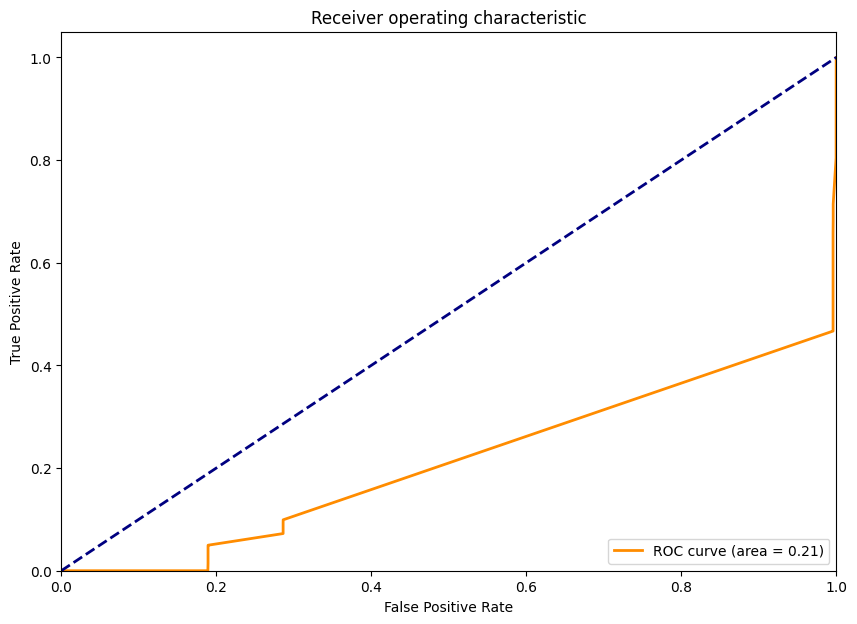

In [6]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

score = df[" min score"]

fpr, tpr, thresholds = roc_curve(y, score)
roc_auc = roc_auc_score(y, score)

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")